# Imports

In [1]:
import importlib
import sys
import torch

sys.path.insert(0, '..')
sys.path.insert(0, '../..')
sys.path.insert(0, '../../..')

# Data

### Load Data Files

In [2]:
# Path to your pickle file (saved with torch.save)
file_path_train = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/BPIC17/BPIC-17_all_normal_3_train.pkl'
# Load the dataset using torch.load
BPIC_17_train_dataset = torch.load(file_path_train, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_train_dataset))

# Path to your pickle file (saved with torch.save)
file_path_val = '../../../../../../ProbabilisticSuffixPredictionLab/risk_controlled_proactive_conformance_checking_dev/data/encoded_data/BPIC17/BPIC-17_all_normal_3_val.pkl'
# Load the dataset using torch.load
BPIC_17_val_dataset = torch.load(file_path_val, weights_only=False)
# Check the type of the loaded dataset
print(type(BPIC_17_val_dataset))

<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


<class 'event_log_loader.new_event_log_loader.EventLogDataset'>


### Train Data Insights

In [3]:
# BPIC 17 Dataset Categories, Features:

bpic_17_all_categories = BPIC_17_train_dataset.all_categories

bpic_17_all_categories_cat = bpic_17_all_categories[0]
print(bpic_17_all_categories_cat)

bpic_17_all_categories_num = bpic_17_all_categories[1]
print(bpic_17_all_categories_num)

for i, cat in enumerate(bpic_17_all_categories_cat):
     print(f"BPIC 17 (5) Categorical feature: {cat[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Total Amount of Category labels: {cat[1]}")
print('\n')    
for i, num in enumerate(bpic_17_all_categories_num):
     print(f"BPIC 17 (5) Numerical feature: {num[0]}, Index position in categorical data list: {i}")
     print(f"BPIC 17 (5) Amount Category Lables: {num[1]}")

[('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 150, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'User_111': 16, 'User_112

### Input Features for Encoder and Decoder

In [4]:
# Create lists with name of Encoder features (input) and decoder features (input & output)

# Encoder features:
enc_feat_cat = []
enc_feat_num = []
for cat in bpic_17_all_categories_cat:
    enc_feat_cat.append(cat[0])
for num in bpic_17_all_categories_num:
    enc_feat_num.append(num[0])
enc_feat = [enc_feat_cat, enc_feat_num]
print("Input features encoder: ", enc_feat)

"""
# Decoder features:
dec_feat_cat = enc_feat_cat
dec_feat_num = enc_feat_num
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)
"""

# Decoder features:
dec_feat_cat = ['concept:name']
dec_feat_num = ['case_elapsed_time', 'event_elapsed_time']
dec_feat = [dec_feat_cat, dec_feat_num]
print("Features decoder: ", dec_feat)

Input features encoder:  [['concept:name', 'Action', 'org:resource', 'EventOrigin', 'lifecycle:transition', 'case:LoanGoal', 'case:ApplicationType', 'Accepted', 'Selected'], ['case_elapsed_time', 'event_elapsed_time', 'day_in_week', 'seconds_in_day', 'case:RequestedAmount', 'FirstWithdrawalAmount', 'NumberOfTerms', 'MonthlyCost', 'CreditScore']]
Features decoder:  [['concept:name'], ['case_elapsed_time', 'event_elapsed_time']]


# Model

In [5]:
import model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model
importlib.reload(model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model)
from model.dropout_uncertainty_enc_dec_LSTM.dropout_uncertainty_model import DropoutUncertaintyEncoderDecoderLSTM

# Prediction decoder output sequence length
# seq_len_pred = 4
seq_len_pred = 2

# Size hidden layer
hidden_size = 128

# Number of cells
num_layers = 4

# Fixed Dropout probability 
dropout = 0.1

# Encoder Decoder model initialization
model = DropoutUncertaintyEncoderDecoderLSTM(data_set_categories=bpic_17_all_categories,
                                             enc_feat=enc_feat,
                                             dec_feat=dec_feat,
                                             seq_len_pred=seq_len_pred,
                                             hidden_size=hidden_size,
                                             num_layers=num_layers,
                                             dropout=dropout)

Data set categories:  ([('concept:name', 28, {'A_Accepted': 1, 'A_Cancelled': 2, 'A_Complete': 3, 'A_Concept': 4, 'A_Create Application': 5, 'A_Denied': 6, 'A_Incomplete': 7, 'A_Pending': 8, 'A_Submitted': 9, 'A_Validating': 10, 'EOS': 11, 'O_Accepted': 12, 'O_Cancelled': 13, 'O_Create Offer': 14, 'O_Created': 15, 'O_Refused': 16, 'O_Returned': 17, 'O_Sent (mail and online)': 18, 'O_Sent (online only)': 19, 'W_Assess potential fraud': 20, 'W_Call after offers': 21, 'W_Call incomplete files': 22, 'W_Complete application': 23, 'W_Handle leads': 24, 'W_Personal Loan collection': 25, 'W_Shortened completion ': 26, 'W_Validate application': 27}), ('Action', 7, {'Created': 1, 'Deleted': 2, 'EOS': 3, 'Obtained': 4, 'Released': 5, 'statechange': 6}), ('org:resource', 150, {'EOS': 1, 'User_1': 2, 'User_10': 3, 'User_100': 4, 'User_101': 5, 'User_102': 6, 'User_103': 7, 'User_104': 8, 'User_105': 9, 'User_106': 10, 'User_107': 11, 'User_108': 12, 'User_109': 13, 'User_11': 14, 'User_110': 15, 'U

# Loss Object Creation

In [6]:
import loss.losses
importlib.reload(loss.losses)
from loss.losses import Loss

loss_obj = Loss()

# Training Configuration

In [7]:
import trainer.trainer
importlib.reload(trainer.trainer)
from trainer.trainer import Trainer
from torch.optim.lr_scheduler import ReduceLROnPlateau

from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter(comment="Full_BPIC17_grad_conf_check")

# device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Start learning rate
learning_rate = 1e-6

# Optimizer and Scheduler
optimizer = torch.optim.AdamW(params=model.parameters(), lr=learning_rate, weight_decay=0)
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, min_lr=1e-10)

# Epochs
num_epochs = 100

# Batch size
batch_size = 256

# lambda for L2 (weight, bias, dropout) regularization: According to formula: 1/2N
# regularization_term = 1.0/(2.0*batch_size)
regularization_term = 1e-4

# shuffle data
shuffle = True

# Teacher forcing: Smaller 0.5 more target events are used for next event prediction.
teacher_forcing_ratio = 0.75

optimize_values = {"regularization_term":regularization_term,
                   "optimizer":optimizer,
                   "scheduler": scheduler,
                   "epochs":num_epochs,
                   "mini_batches":batch_size,
                   "shuffle": shuffle,
                   "teacher_forcing_ratio":teacher_forcing_ratio,}

suffix_data_split_value = seq_len_pred

# GradNorm parameter
use_gradnorm = True
gn_alpha = 1.5
gn_learning_rate = 1e-4

number_tasks = len(dec_feat[0]) + len(dec_feat[1])

gradNorm = {"use_gradnorm":use_gradnorm,
            "number_tasks": number_tasks,
            "gn_alpha":gn_alpha,
            "gn_learning_rate": gn_learning_rate}

trainer = Trainer(device=device,
                  model=model,
                  data_train=BPIC_17_train_dataset,
                  data_val=BPIC_17_val_dataset,
                  loss_obj=loss_obj,
                  log_normal_loss_num_feature= [],
                  optimize_values=optimize_values,
                  suffix_data_split_value=suffix_data_split_value,
                  writer=writer,
                  gradnorm_values=gradNorm,
                  save_model_n_th_epoch = 1,
                  saving_path = 'BPIC_2017_full_grad_norm_proactive_conf_check.pkl')

# Train the model:
train_attenuated_losses, val_losses, val_attenuated_losses = trainer.train_model()

Device:  cuda
Model:  DropoutUncertaintyEncoderDecoderLSTM(
  (embeddings_enc): ModuleList(
    (0): Embedding(28, 10)
    (1): Embedding(7, 5)
    (2): Embedding(150, 26)
    (3): Embedding(5, 4)
    (4): Embedding(9, 5)
    (5): Embedding(16, 8)
    (6): Embedding(4, 3)
    (7-8): 2 x Embedding(5, 4)
  )
  (encoder): DropoutUncertaintyLSTMEncoder(
    (embeddings): ModuleList(
      (0): Embedding(28, 10)
      (1): Embedding(7, 5)
      (2): Embedding(150, 26)
      (3): Embedding(5, 4)
      (4): Embedding(9, 5)
      (5): Embedding(16, 8)
      (6): Embedding(4, 3)
      (7-8): 2 x Embedding(5, 4)
    )
    (first_layer): DropoutUncertaintyLSTMCell(
      (Wi): Linear(in_features=78, out_features=128, bias=True)
      (Ui): Linear(in_features=128, out_features=128, bias=True)
      (Wf): Linear(in_features=78, out_features=128, bias=True)
      (Uf): Linear(in_features=128, out_features=128, bias=True)
      (Wc): Linear(in_features=78, out_features=128, bias=True)
      (Uc): Lin

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch [1/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 5.4572


Validation: Avg Standard Validation Loss: 5.4169
Validation: Avg Attenuated Validation Loss: 4.8377
Validation Loss for Scheduler: 5.4169
saving model


Epoch [2/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 6.0218


Validation: Avg Standard Validation Loss: 5.3786
Validation: Avg Attenuated Validation Loss: 4.7867
Validation Loss for Scheduler: 5.3786
saving model


Epoch [3/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 6.2000


Validation: Avg Standard Validation Loss: 4.9919
Validation: Avg Attenuated Validation Loss: 4.2792
Validation Loss for Scheduler: 4.9919
saving model


Epoch [4/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 5.3510


Validation: Avg Standard Validation Loss: 4.7460
Validation: Avg Attenuated Validation Loss: 3.8711
Validation Loss for Scheduler: 4.7460
saving model


Epoch [5/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.9143


Validation: Avg Standard Validation Loss: 4.5659
Validation: Avg Attenuated Validation Loss: 3.6401
Validation Loss for Scheduler: 4.5659
saving model


Epoch [6/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.6950


Validation: Avg Standard Validation Loss: 4.1315
Validation: Avg Attenuated Validation Loss: 3.1143
Validation Loss for Scheduler: 4.1315
saving model


Epoch [7/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.5506


Validation: Avg Standard Validation Loss: 3.9790
Validation: Avg Attenuated Validation Loss: 2.7944
Validation Loss for Scheduler: 3.9790
saving model


Epoch [8/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.3785


Validation: Avg Standard Validation Loss: 3.8462
Validation: Avg Attenuated Validation Loss: 2.4716
Validation Loss for Scheduler: 3.8462
saving model


Epoch [9/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 4.1634


Validation: Avg Standard Validation Loss: 3.7322
Validation: Avg Attenuated Validation Loss: 2.2078
Validation Loss for Scheduler: 3.7322
saving model


Epoch [10/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 3.8436


Validation: Avg Standard Validation Loss: 3.6407
Validation: Avg Attenuated Validation Loss: 2.0104
Validation Loss for Scheduler: 3.6407
saving model


Epoch [11/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 3.5073


Validation: Avg Standard Validation Loss: 3.5584
Validation: Avg Attenuated Validation Loss: 1.8451
Validation Loss for Scheduler: 3.5584
saving model


Epoch [12/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 3.1555


Validation: Avg Standard Validation Loss: 3.4819
Validation: Avg Attenuated Validation Loss: 1.7075
Validation Loss for Scheduler: 3.4819
saving model


Epoch [13/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 2.8688


Validation: Avg Standard Validation Loss: 3.4101
Validation: Avg Attenuated Validation Loss: 1.5918
Validation Loss for Scheduler: 3.4101
saving model


Epoch [14/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 2.6339


Validation: Avg Standard Validation Loss: 3.3497
Validation: Avg Attenuated Validation Loss: 1.5051
Validation Loss for Scheduler: 3.3497
saving model


Epoch [15/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 2.4027


Validation: Avg Standard Validation Loss: 3.2991
Validation: Avg Attenuated Validation Loss: 1.4230
Validation Loss for Scheduler: 3.2991
saving model


Epoch [16/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 2.2181


Validation: Avg Standard Validation Loss: 3.2546
Validation: Avg Attenuated Validation Loss: 1.3497
Validation Loss for Scheduler: 3.2546
saving model


Epoch [17/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 2.0108


Validation: Avg Standard Validation Loss: 3.2183
Validation: Avg Attenuated Validation Loss: 1.2825
Validation Loss for Scheduler: 3.2183
saving model


Epoch [18/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.7898


Validation: Avg Standard Validation Loss: 3.1862
Validation: Avg Attenuated Validation Loss: 1.2089
Validation Loss for Scheduler: 3.1862
saving model


Epoch [19/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.5700


Validation: Avg Standard Validation Loss: 3.1611
Validation: Avg Attenuated Validation Loss: 1.1618
Validation Loss for Scheduler: 3.1611
saving model


Epoch [20/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.75
Training: Avg Attenuated Training Loss: 1.3948


Validation: Avg Standard Validation Loss: 3.1385
Validation: Avg Attenuated Validation Loss: 1.1272
Validation Loss for Scheduler: 3.1385
saving model


Epoch [21/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 1.2598


Validation: Avg Standard Validation Loss: 3.1181
Validation: Avg Attenuated Validation Loss: 1.0867
Validation Loss for Scheduler: 3.1181
saving model


Epoch [22/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 1.1164


Validation: Avg Standard Validation Loss: 3.1008
Validation: Avg Attenuated Validation Loss: 1.0751
Validation Loss for Scheduler: 3.1008
saving model


Epoch [23/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.9968


Validation: Avg Standard Validation Loss: 3.0879
Validation: Avg Attenuated Validation Loss: 1.0725
Validation Loss for Scheduler: 3.0879
saving model


Epoch [24/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.8834


Validation: Avg Standard Validation Loss: 3.0729
Validation: Avg Attenuated Validation Loss: 1.0453
Validation Loss for Scheduler: 3.0729
saving model


Epoch [25/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.7547


Validation: Avg Standard Validation Loss: 3.0603
Validation: Avg Attenuated Validation Loss: 1.0241
Validation Loss for Scheduler: 3.0603
saving model


Epoch [26/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.6274


Validation: Avg Standard Validation Loss: 3.0489
Validation: Avg Attenuated Validation Loss: 0.9739
Validation Loss for Scheduler: 3.0489
saving model


Epoch [27/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.5309


Validation: Avg Standard Validation Loss: 3.0365
Validation: Avg Attenuated Validation Loss: 0.9271
Validation Loss for Scheduler: 3.0365
saving model


Epoch [28/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.4491


Validation: Avg Standard Validation Loss: 3.0267
Validation: Avg Attenuated Validation Loss: 0.9169
Validation Loss for Scheduler: 3.0267
saving model


Epoch [29/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.3968


Validation: Avg Standard Validation Loss: 3.0158
Validation: Avg Attenuated Validation Loss: 0.8856
Validation Loss for Scheduler: 3.0158
saving model


Epoch [30/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.3087


Validation: Avg Standard Validation Loss: 3.0067
Validation: Avg Attenuated Validation Loss: 0.8535
Validation Loss for Scheduler: 3.0067
saving model


Epoch [31/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.2263


Validation: Avg Standard Validation Loss: 2.9958
Validation: Avg Attenuated Validation Loss: 0.8302
Validation Loss for Scheduler: 2.9958
saving model


Epoch [32/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.1582


Validation: Avg Standard Validation Loss: 2.9883
Validation: Avg Attenuated Validation Loss: 0.8104
Validation Loss for Scheduler: 2.9883
saving model


Epoch [33/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.1006


Validation: Avg Standard Validation Loss: 2.9788
Validation: Avg Attenuated Validation Loss: 0.7913
Validation Loss for Scheduler: 2.9788
saving model


Epoch [34/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: 0.0332


Validation: Avg Standard Validation Loss: 2.9706
Validation: Avg Attenuated Validation Loss: 0.7542
Validation Loss for Scheduler: 2.9706
saving model


Epoch [35/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: -0.0310


Validation: Avg Standard Validation Loss: 2.9615
Validation: Avg Attenuated Validation Loss: 0.7583
Validation Loss for Scheduler: 2.9615
saving model


Epoch [36/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: -0.0692


Validation: Avg Standard Validation Loss: 2.9524
Validation: Avg Attenuated Validation Loss: 0.7065
Validation Loss for Scheduler: 2.9524
saving model


Epoch [37/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: -0.1333


Validation: Avg Standard Validation Loss: 2.9454
Validation: Avg Attenuated Validation Loss: 0.7245
Validation Loss for Scheduler: 2.9454
saving model


Epoch [38/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: -0.1753


Validation: Avg Standard Validation Loss: 2.9369
Validation: Avg Attenuated Validation Loss: 0.6987
Validation Loss for Scheduler: 2.9369
saving model


Epoch [39/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: -0.2401


Validation: Avg Standard Validation Loss: 2.9293
Validation: Avg Attenuated Validation Loss: 0.6628
Validation Loss for Scheduler: 2.9293
saving model


Epoch [40/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.72
Training: Avg Attenuated Training Loss: -0.2412


Validation: Avg Standard Validation Loss: 2.9217
Validation: Avg Attenuated Validation Loss: 0.6610
Validation Loss for Scheduler: 2.9217
saving model


Epoch [41/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.2958


Validation: Avg Standard Validation Loss: 2.9136
Validation: Avg Attenuated Validation Loss: 0.6545
Validation Loss for Scheduler: 2.9136
saving model


Epoch [42/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.3331


Validation: Avg Standard Validation Loss: 2.9042
Validation: Avg Attenuated Validation Loss: 0.6352
Validation Loss for Scheduler: 2.9042
saving model


Epoch [43/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.3647


Validation: Avg Standard Validation Loss: 2.8962
Validation: Avg Attenuated Validation Loss: 0.6221
Validation Loss for Scheduler: 2.8962
saving model


Epoch [44/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.3879


Validation: Avg Standard Validation Loss: 2.8875
Validation: Avg Attenuated Validation Loss: 0.5951
Validation Loss for Scheduler: 2.8875
saving model


Epoch [45/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.4628


Validation: Avg Standard Validation Loss: 2.8800
Validation: Avg Attenuated Validation Loss: 0.6007
Validation Loss for Scheduler: 2.8800
saving model


Epoch [46/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.4382


Validation: Avg Standard Validation Loss: 2.8712
Validation: Avg Attenuated Validation Loss: 0.5683
Validation Loss for Scheduler: 2.8712
saving model


Epoch [47/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.4466


Validation: Avg Standard Validation Loss: 2.8619
Validation: Avg Attenuated Validation Loss: 0.5507
Validation Loss for Scheduler: 2.8619
saving model


Epoch [48/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.4716


Validation: Avg Standard Validation Loss: 2.8522
Validation: Avg Attenuated Validation Loss: 0.5377
Validation Loss for Scheduler: 2.8522
saving model


Epoch [49/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5052


Validation: Avg Standard Validation Loss: 2.8455
Validation: Avg Attenuated Validation Loss: 0.5200
Validation Loss for Scheduler: 2.8455
saving model


Epoch [50/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5140


Validation: Avg Standard Validation Loss: 2.8335
Validation: Avg Attenuated Validation Loss: 0.4746
Validation Loss for Scheduler: 2.8335
saving model


Epoch [51/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.4974


Validation: Avg Standard Validation Loss: 2.8283
Validation: Avg Attenuated Validation Loss: 0.5006
Validation Loss for Scheduler: 2.8283
saving model


Epoch [52/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5059


Validation: Avg Standard Validation Loss: 2.8175
Validation: Avg Attenuated Validation Loss: 0.4743
Validation Loss for Scheduler: 2.8175
saving model


Epoch [53/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5269


Validation: Avg Standard Validation Loss: 2.8084
Validation: Avg Attenuated Validation Loss: 0.4512
Validation Loss for Scheduler: 2.8084
saving model


Epoch [54/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5068


Validation: Avg Standard Validation Loss: 2.8000
Validation: Avg Attenuated Validation Loss: 0.4397
Validation Loss for Scheduler: 2.8000
saving model


Epoch [55/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5393


Validation: Avg Standard Validation Loss: 2.7896
Validation: Avg Attenuated Validation Loss: 0.4527
Validation Loss for Scheduler: 2.7896
saving model


Epoch [56/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5447


Validation: Avg Standard Validation Loss: 2.7815
Validation: Avg Attenuated Validation Loss: 0.4031
Validation Loss for Scheduler: 2.7815
saving model


Epoch [57/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5454


Validation: Avg Standard Validation Loss: 2.7724
Validation: Avg Attenuated Validation Loss: 0.4068
Validation Loss for Scheduler: 2.7724
saving model


Epoch [58/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5527


Validation: Avg Standard Validation Loss: 2.7651
Validation: Avg Attenuated Validation Loss: 0.3913
Validation Loss for Scheduler: 2.7651
saving model


Epoch [59/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5372


Validation: Avg Standard Validation Loss: 2.7553
Validation: Avg Attenuated Validation Loss: 0.3632
Validation Loss for Scheduler: 2.7553
saving model


Epoch [60/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6911999999999999
Training: Avg Attenuated Training Loss: -0.5310


Validation: Avg Standard Validation Loss: 2.7460
Validation: Avg Attenuated Validation Loss: 0.3686
Validation Loss for Scheduler: 2.7460
saving model


Epoch [61/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.5106


Validation: Avg Standard Validation Loss: 2.7367
Validation: Avg Attenuated Validation Loss: 0.4240
Validation Loss for Scheduler: 2.7367
saving model


Epoch [62/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.4933


Validation: Avg Standard Validation Loss: 2.7289
Validation: Avg Attenuated Validation Loss: 0.4601
Validation Loss for Scheduler: 2.7289
saving model


Epoch [63/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.5435


Validation: Avg Standard Validation Loss: 2.7214
Validation: Avg Attenuated Validation Loss: 0.4199
Validation Loss for Scheduler: 2.7214
saving model


Epoch [64/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.5328


Validation: Avg Standard Validation Loss: 2.7124
Validation: Avg Attenuated Validation Loss: 0.4141
Validation Loss for Scheduler: 2.7124
saving model


Epoch [65/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6000


Validation: Avg Standard Validation Loss: 2.7033
Validation: Avg Attenuated Validation Loss: 0.4237
Validation Loss for Scheduler: 2.7033
saving model


Epoch [66/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.5703


Validation: Avg Standard Validation Loss: 2.6954
Validation: Avg Attenuated Validation Loss: 0.3969
Validation Loss for Scheduler: 2.6954
saving model


Epoch [67/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.5937


Validation: Avg Standard Validation Loss: 2.6880
Validation: Avg Attenuated Validation Loss: 0.4088
Validation Loss for Scheduler: 2.6880
saving model


Epoch [68/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.5836


Validation: Avg Standard Validation Loss: 2.6794
Validation: Avg Attenuated Validation Loss: 0.3551
Validation Loss for Scheduler: 2.6794
saving model


Epoch [69/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6555


Validation: Avg Standard Validation Loss: 2.6720
Validation: Avg Attenuated Validation Loss: 0.3630
Validation Loss for Scheduler: 2.6720
saving model


Epoch [70/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6525


Validation: Avg Standard Validation Loss: 2.6644
Validation: Avg Attenuated Validation Loss: 0.3268
Validation Loss for Scheduler: 2.6644
saving model


Epoch [71/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6339


Validation: Avg Standard Validation Loss: 2.6566
Validation: Avg Attenuated Validation Loss: 0.3488
Validation Loss for Scheduler: 2.6566
saving model


Epoch [72/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6442


Validation: Avg Standard Validation Loss: 2.6496
Validation: Avg Attenuated Validation Loss: 0.3435
Validation Loss for Scheduler: 2.6496
saving model


Epoch [73/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6182


Validation: Avg Standard Validation Loss: 2.6414
Validation: Avg Attenuated Validation Loss: 0.3229
Validation Loss for Scheduler: 2.6414
saving model


Epoch [74/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6425


Validation: Avg Standard Validation Loss: 2.6346
Validation: Avg Attenuated Validation Loss: 0.2926
Validation Loss for Scheduler: 2.6346
saving model


Epoch [75/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6135


Validation: Avg Standard Validation Loss: 2.6269
Validation: Avg Attenuated Validation Loss: 0.2788
Validation Loss for Scheduler: 2.6269
saving model


Epoch [76/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6719


Validation: Avg Standard Validation Loss: 2.6199
Validation: Avg Attenuated Validation Loss: 0.2816
Validation Loss for Scheduler: 2.6199
saving model


Epoch [77/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.7263


Validation: Avg Standard Validation Loss: 2.6160
Validation: Avg Attenuated Validation Loss: 0.3240
Validation Loss for Scheduler: 2.6160
saving model


Epoch [78/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6573


Validation: Avg Standard Validation Loss: 2.6100
Validation: Avg Attenuated Validation Loss: 0.3061
Validation Loss for Scheduler: 2.6100
saving model


Epoch [79/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.6783


Validation: Avg Standard Validation Loss: 2.5997
Validation: Avg Attenuated Validation Loss: 0.2456
Validation Loss for Scheduler: 2.5997
saving model


Epoch [80/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6635519999999999
Training: Avg Attenuated Training Loss: -0.7022


Validation: Avg Standard Validation Loss: 2.5956
Validation: Avg Attenuated Validation Loss: 0.2722
Validation Loss for Scheduler: 2.5956
saving model


Epoch [81/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6762


Validation: Avg Standard Validation Loss: 2.5887
Validation: Avg Attenuated Validation Loss: 0.2523
Validation Loss for Scheduler: 2.5887
saving model


Epoch [82/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6978


Validation: Avg Standard Validation Loss: 2.5835
Validation: Avg Attenuated Validation Loss: 0.2683
Validation Loss for Scheduler: 2.5835
saving model


Epoch [83/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6137


Validation: Avg Standard Validation Loss: 2.5797
Validation: Avg Attenuated Validation Loss: 0.2151
Validation Loss for Scheduler: 2.5797
saving model


Epoch [84/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7295


Validation: Avg Standard Validation Loss: 2.5717
Validation: Avg Attenuated Validation Loss: 0.2144
Validation Loss for Scheduler: 2.5717
saving model


Epoch [85/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7212


Validation: Avg Standard Validation Loss: 2.5674
Validation: Avg Attenuated Validation Loss: 0.2330
Validation Loss for Scheduler: 2.5674
saving model


Epoch [86/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7028


Validation: Avg Standard Validation Loss: 2.5627
Validation: Avg Attenuated Validation Loss: 0.2509
Validation Loss for Scheduler: 2.5627
saving model


Epoch [87/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6763


Validation: Avg Standard Validation Loss: 2.5568
Validation: Avg Attenuated Validation Loss: 0.1941
Validation Loss for Scheduler: 2.5568
saving model


Epoch [88/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6973


Validation: Avg Standard Validation Loss: 2.5523
Validation: Avg Attenuated Validation Loss: 0.2053
Validation Loss for Scheduler: 2.5523
saving model


Epoch [89/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7418


Validation: Avg Standard Validation Loss: 2.5465
Validation: Avg Attenuated Validation Loss: 0.1805
Validation Loss for Scheduler: 2.5465
saving model


Epoch [90/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6243


Validation: Avg Standard Validation Loss: 2.5415
Validation: Avg Attenuated Validation Loss: 0.2187
Validation Loss for Scheduler: 2.5415
saving model


Epoch [91/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6980


Validation: Avg Standard Validation Loss: 2.5377
Validation: Avg Attenuated Validation Loss: 0.2207
Validation Loss for Scheduler: 2.5377
saving model


Epoch [92/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7269


Validation: Avg Standard Validation Loss: 2.5347
Validation: Avg Attenuated Validation Loss: 0.2834
Validation Loss for Scheduler: 2.5347
saving model


Epoch [93/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6885


Validation: Avg Standard Validation Loss: 2.5281
Validation: Avg Attenuated Validation Loss: 0.2387
Validation Loss for Scheduler: 2.5281
saving model


Epoch [94/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7303


Validation: Avg Standard Validation Loss: 2.5208
Validation: Avg Attenuated Validation Loss: 0.1583
Validation Loss for Scheduler: 2.5208
saving model


Epoch [95/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7041


Validation: Avg Standard Validation Loss: 2.5185
Validation: Avg Attenuated Validation Loss: 0.1537
Validation Loss for Scheduler: 2.5185
saving model


Epoch [96/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6560


Validation: Avg Standard Validation Loss: 2.5147
Validation: Avg Attenuated Validation Loss: 0.1612
Validation Loss for Scheduler: 2.5147
saving model


Epoch [97/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.7036


Validation: Avg Standard Validation Loss: 2.5092
Validation: Avg Attenuated Validation Loss: 0.1351
Validation Loss for Scheduler: 2.5092
saving model


Epoch [98/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6647


Validation: Avg Standard Validation Loss: 2.5036
Validation: Avg Attenuated Validation Loss: 0.2166
Validation Loss for Scheduler: 2.5036
saving model


Epoch [99/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6747


Validation: Avg Standard Validation Loss: 2.4983
Validation: Avg Attenuated Validation Loss: 0.1779
Validation Loss for Scheduler: 2.4983
saving model


Epoch [100/100], Learning Rate: 1e-06, Teacher forcing ratio: 0.6370099199999999
Training: Avg Attenuated Training Loss: -0.6559


Validation: Avg Standard Validation Loss: 2.4950
Validation: Avg Attenuated Validation Loss: 0.1885
Validation Loss for Scheduler: 2.4950
saving model
Training complete.
Model saved to path: BPIC_2017_full_grad_norm_proactive_conf_check.pkl


# Training Visualization

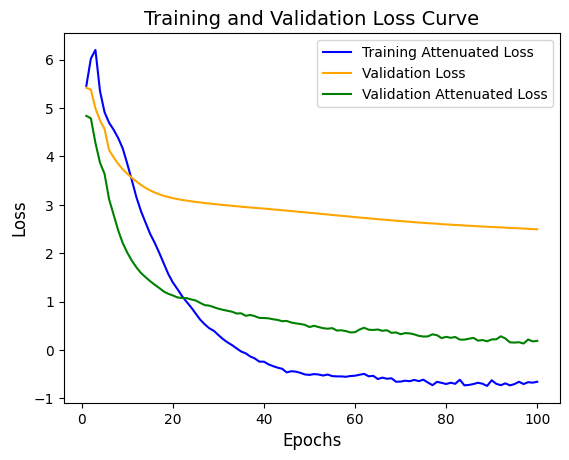

In [8]:
import matplotlib.pyplot as plt

# After training is finished, plot the loss curves
plt.plot(range(1, num_epochs+1), train_attenuated_losses, label='Training Attenuated Loss', color='blue')
plt.plot(range(1, num_epochs+1), val_losses, label='Validation Loss', color='orange')
plt.plot(range(1, num_epochs+1), val_attenuated_losses, label='Validation Attenuated Loss', color='green')
# Labeling x and y axes
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
# Adding title
plt.title('Training and Validation Loss Curve', fontsize=14)
# Adding legend
plt.legend()
# Show the plot
plt.show()